# Modeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [3]:
def temp_change(df, i):
    """
    takes a dataframe, df, and an index, i

    returns the average difference between the temperature in the data row and the extreme temperature in both degrees Celsius and standard deviations
    """
    lat = int(df.loc[i,'latitude'])
    long = int(df.loc[i,'longitude'])
    start_date = dt.datetime.fromisoformat(df.loc[i,'start_date'])
    end_date = dt.datetime.fromisoformat(df.loc[i,'end_date'])
    temp = df.loc[i,'temperature']
    #duration = df.loc[i,'duration']
    
    monthly_sum = pd.read_csv(f"../data/temp_events/monthly_summary_lat={lat}_long={long}.csv", index_col='month', usecols=['month', 'min_std', 'min_extreme'])
    
    
    dates = pd.date_range(start= start_date, end= end_date)
    delta_C = []
    delta_std = []
    
    for date in dates:
        delta_temp_C = temp - monthly_sum.loc[date.month, 'min_extreme']
        delta_C.append(delta_temp_C)
        
        delta_std.append(delta_temp_C / monthly_sum.loc[date.month, 'min_std'])

    return np.mean(delta_C), np.mean(delta_std)

## Location Information 

In [57]:
data = [
    {'country': 'Afghanistan', 'location': 'Kabul', 'exact_latitude': 34.555, 'exact_longitude':69.2, 'latitude': 30, 'longitude': 70}, 
    {'country': 'Poland', 'location': 'Warsaw', 'exact_latitude': 52.2, 'exact_longitude': 21.0, 'latitude': 50, 'longitude': 20}, 
    {'country': 'Peru', 'exact_latitude': -9.2, 'exact_longitude': -75, 'latitude': -10, 'longitude':-70}, 
    {'country': 'Germany',  'exact_latitude': 51, 'exact_longitude': 10.5, 'latitude': 50, 'longitude': 10}, 
    {'country': 'France', 'exact_latitude': 46.2, 'exact_longitude': 2.2, 'latitude': 50, 'longitude':0}, 
    {'country': 'South Africa', 'latitude': -30, 'longitude': 30}, 
    {'country': 'India',  'latitude': 20, 'longitude': 80}, 
    {'country': 'Romania',  'exact_latitude': 45, 'exact_longitude': 25, 'latitude': 50, 'longitude':20}, 
    {'country': 'United Kingdom of Great Britain and Northern Ireland',  'latitude': 51, 'longitude':0}, 
    {'country': 'Bangladesh',  'exact_latitude': 25, 'exact_longitude': 90, 'latitude': 30, 'longitude': 90}, 
    {'country': 'Russian Federation', 'latitude': 60, 'longitude': 30}, 
    {'country': 'Lithuania',  'exact_latitude': 55, 'exact_longitude': 24, 'latitude': 60, 'longitude': 30}, 
    {'country': 'China',  'exact_latitude': 30, 'exact_longitude': 110, 'latitude': 30, 'longitude': 110}, 
    {'country': 'Mexico', 'latitude': 20, 'longitude':-100}, 
    {'country': 'Nepal', 'exact_latitude': 28.5, 'exact_longitude': 84, 'latitude': 30, 'longitude': 80}, 
    {'country': 'Bosnia and Herzegovina',  'exact_latitude': 44, 'exact_longitude': 18, 'latitude': 40, 'longitude': 20}, 
    {'country': 'Republic of Moldova', 'exact_latitude': 47, 'exact_longitude': 29, 'latitude': 50, 'longitude':30}, 
    {'country': 'Bulgaria', 'exact_latitude': 43, 'exact_longitude': 26, 'latitude': 40, 'longitude':30}, 
    {'country': 'Switzerland', 'exact_latitude': 47, 'exact_longitude': 8, 'latitude': 50, 'longitude':10}, 
    {'country': 'Croatia', 'exact_latitude': 45, 'exact_longitude': 15, 'latitude': 40, 'longitude': 20}, 
    {'country': 'Serbia', 'exact_latitude': 44, 'exact_longitude': 21, 'latitude': 40, 'longitude': 20},
    {'country': 'Ukraine', 'exact_latitude': 50, 'exact_longitude': 30, 'latitude': 50, 'longitude': 30},
    {'country': 'Kyrgyzstan', 'exact_latitude': 41, 'exact_longitude': 75, 'latitude': 40, 'longitude': 70},
    {'country': 'Japan', 'exact_latitude': 36, 'exact_longitude': 138, 'latitude': 40, 'longitude': 140},
    {'country': 'Republic of Korea', 'exact_latitude': 36, 'exact_longitude': 127, 'latitude': 30, 'longitude':120},
    {'country': 'Thailand', 'exact_latitude': 16, 'exact_longitude': 101, 'latitude': 20, 'longitude': 100},
    {'country': 'Taiwan (Province of China)', 'exact_latitude': 24, 'exact_longitude': 121, 'latitude': 30, 'longitude': 120},
    {'country': 'Czechia', 'exact_latitude': 50, 'exact_longitude': 15, 'latitude': 50, 'longitude': 20},
    {'country': 'Estonia', 'exact_latitude': 59, 'exact_longitude': 25, 'latitude': 60, 'longitude': 30},
    {'country': 'Italy', 'exact_latitude': 42, 'exact_longitude': 13, 'latitude': 40, 'longitude': 20},
    {'country': 'Algeria', 'exact_latitude': 30, 'exact_longitude': 0, 'latitude': 30, 'longitude':0},
    {'country': 'State of Palestine',  'exact_latitude': 32, 'exact_longitude': 35, 'latitude': 30, 'longitude': 40},
    {'country': 'Mongolia', 'exact_latitude': 47, 'exact_longitude': 105, 'latitude': 50, 'longitude':100},
    {'country': 'Pakistan', 'exact_latitude': 30.4, 'exact_longitude': 69.3, 'latitude': 30, 'longitude': 70},
    {'country': 'Belgium', 'exact_latitude': 50.5, 'exact_longitude': 4.47, 'latitude': 50, 'longitude': 10},
    {'country': 'Spain', 'exact_latitude': 40.5, 'exact_longitude': 3.7, 'latitude': 40, 'longitude': 0},
    {'country': 'Netherlands (Kingdom of the)', 'exact_latitude': 52.1, 'exact_longitude': 5.3, 'latitude': 50, 'longitude': 10},
    {'country': 'Portugal', 'exact_latitude': 39.4, 'exact_longitude': -8.22, 'latitude': 40, 'longitude': 0},
    {'country': 'Canary Islands', 'exact_latitude': 28.3, 'exact_longitude': -16.6, 'latitude': 20, 'longitude': -10},
    {'country': 'Slovakia', 'exact_latitude': 48.7, 'exact_longitude': 19.7, 'latitude': 50, 'longitude': 20},
    {'country': 'Sudan', 'exact_latitude': 12.8, 'exact_longitude': 30, 'latitude': 20, 'longitude': 30},
    {'country': 'Austria', 'exact_latitude': 47, 'exact_longitude': 134, 'latitude': 50, 'longitude': 10},
    {'country': 'Albania', 'exact_latitude': 41, 'exact_longitude': 20, 'latitude': 40, 'longitude': 20},
    {'country': 'Switzerland', 'exact_latitude': 46.8, 'exact_longitude': 8, 'latitude': 50, 'longitude': 10},
    {'country': 'Cyprus', 'exact_latitude': 35, 'exact_longitude': 33, 'latitude': 40, 'longitude': 30},
    {'country': 'Denmark', 'exact_latitude': 56, 'exact_longitude': 9.5, 'latitude': 50, 'longitude': 10},
    {'country': 'Estonia', 'exact_latitude': 58.6, 'exact_longitude': 25, 'latitude': 60, 'longitude': 30},
    {'country': 'Finland', 'exact_latitude': 61.9, 'exact_longitude': 25.7, 'latitude': 60, 'longitude': 30},
    {'country': 'Greece', 'exact_latitude': 39.1, 'exact_longitude': 21.8, 'latitude': 40, 'longitude': 20},
    {'country': 'Hungary', 'exact_latitude': 47.2, 'exact_longitude': 19.5, 'latitude': 50, 'longitude': 20},
    {'country': 'Ireland', 'exact_latitude': 53.8, 'exact_longitude': -7.3, 'latitude': 51, 'longitude': 0},
    {'country': 'Lithuania', 'exact_latitude': 55.2, 'exact_longitude': 23.9, 'latitude': 50, 'longitude': 20},
    {'country': 'Luxembourg', 'exact_latitude': 49.8, 'exact_longitude': 6.1, 'latitude': 50, 'longitude': 10},
    {'country': 'Latvia', 'exact_latitude': 56.9, 'exact_longitude': 24.6, 'latitude': 50, 'longitude': 20},
    {'country': 'Malta', 'exact_latitude': 35.9, 'exact_longitude': 14.4, 'latitude': 40, 'longitude': 20},
    {'country': 'Montenegro', 'exact_latitude': 42.7, 'exact_longitude': 19.4, 'latitude': 40, 'longitude': 20},
    {'country': 'Norway', 'exact_latitude': 60.5, 'exact_longitude': 8.5, 'latitude': 60, 'longitude': 10},
    {'country': 'Poland', 'exact_latitude': 51.9, 'exact_longitude': 19.1, 'latitude': 50, 'longitude': 20},
    {'country': 'Serbia', 'exact_latitude': 44, 'exact_longitude': 21, 'latitude': 40, 'longitude': 20},
    {'country': 'Slovenia', 'exact_latitude': 46.2, 'exact_longitude': 15, 'latitude': 50, 'longitude': 20},
    {'country': 'Sweden', 'exact_latitude': 60.1, 'exact_longitude': 18.6, 'latitude': 60, 'longitude': 20},
    {'country': 'Myanmar', 'exact_latitude': 21.9, 'exact_longitude': 95.95, 'latitude': 20, 'longitude': 100},
    {'country': 'Saudi Arabia', 'exact_latitude': 23.9, 'exact_longitude': 45.1, 'latitude': 20, 'longitude': 50},
    {'country': 'Morocco', 'exact_latitude': 31.8, 'exact_longitude': -7.1, 'latitude': 30, 'longitude': 0},
    {'country': 'United State of America', 'latitude': 40, 'longitude': -100}
]

In [58]:
dataframe = pd.DataFrame(data)

In [59]:
dataframe.to_csv('../data/extreme_temp/locations_lat_long.csv', index=False)

In [60]:
dataframe_no_usa = dataframe[dataframe['country']!='United States of America']

## Heat Deaths

In [16]:
heat_deaths = pd.read_csv('../data/extreme_temp/heat_deaths_reported.csv').drop(columns= ['Unnamed: 0'])

In [17]:
heat_deaths.head()

,disaster_subtype,country,subregion,region,location,temperature,magnitude_scale,start_year,start_month,total_deaths,start_date,end_date,duration_days
0,Heat wave,India,Southern Asia,Asia,"Madhya Pradesh, Andhra Pradesh, Uttar Pradesh,...",50.0,°C,2002,5,1030.0,2002-05-10,2002-05-22,12 days
1,Heat wave,Bangladesh,Southern Asia,Asia,"Dhaka, Khulna, Rajshahi provinces",40.0,°C,2003,5,62.0,2003-05-10,2003-06-12,33 days
2,Heat wave,India,Southern Asia,Asia,"Andhra Pradesh, Orissa, Tamil Nadu, Vidarbha (...",49.0,°C,2003,5,1210.0,2003-05-14,2003-06-06,23 days
3,Heat wave,Pakistan,Southern Asia,Asia,Punjab province,50.0,°C,2003,5,200.0,2003-05-01,2003-06-06,36 days
4,Heat wave,Belgium,Western Europe,Europe,Region de Bruxelles-Capitale/Brussels Hoofdste...,NaN,°C,2003,8,1175.0,2003-08-01,2003-08-15,14 days


In [18]:
heat_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   disaster_subtype  111 non-null    object 
 1   country           111 non-null    object 
 2   subregion         111 non-null    object 
 3   region            111 non-null    object 
 4   location          62 non-null     object 
 5   temperature       82 non-null     float64
 6   magnitude_scale   111 non-null    object 
 7   start_year        111 non-null    int64  
 8   start_month       111 non-null    int64  
 9   total_deaths      111 non-null    float64
 10  start_date        111 non-null    object 
 11  end_date          111 non-null    object 
 12  duration_days     111 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 11.4+ KB


In [24]:
for i in heat_deaths.index:
    heat_deaths.loc[i, 'duration'] = (heat_deaths.loc[i,'duration_days'].split(' ')[0])

In [25]:
heat_deaths = heat_deaths.dropna(subset=['temperature'])

In [26]:
heat_deaths_no_usa = heat_deaths[heat_deaths['country']!='United States of America']

In [61]:
df_hot = pd.merge(left= heat_deaths.drop(columns=['disaster_subtype', 'magnitude_scale']), right= dataframe.drop(columns=['location','exact_latitude', 'exact_longitude']), how= 'left', on='country')

In [62]:
df_hot = df_hot.reset_index(drop=True)

In [63]:
delta_temps = []

for i in df_hot.index:
    try:
        delta_C, delta_std = temp_change(df_hot,i)
        delta_temps.append({'delta_temp_C': delta_C, 'delta_temp_std': delta_std})
    except:
        pass

In [64]:
hot_df = pd.merge(left= df_hot, right= pd.DataFrame(delta_temps), left_index=True, right_index=True)

In [65]:
hot_df.to_csv('../data/hot_final_dataset.csv')

## Cold Deaths

In [41]:
cold_deaths = pd.read_csv('../data/extreme_temp/cold_deaths_reported.csv').drop(columns= ['Unnamed: 0'])

In [42]:
cold_deaths.head()

,disaster_subtype,country,subregion,region,location,temperature,magnitude_scale,start_year,start_month,total_deaths,start_date,end_date,duration_days
0,Cold wave,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.0,°C,2001,1,150.0,2001-01-31,2001-02-20,20 days
1,Cold wave,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,°C,2001,10,270.0,2001-10-10,2002-01-20,102 days
2,Cold wave,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.0,°C,2003,7,339.0,2003-07-07,2003-08-15,39 days
3,Cold wave,United States of America,Northern America,Americas,"Connecticut, Delaware, Maryland, Maine, New Ha...",NaN,°C,2004,1,3.0,2004-01-09,2004-01-12,3 days
4,Cold wave,Germany,Western Europe,Europe,Nordrhein-Westfalen province,NaN,°C,2005,11,1.0,2005-11-25,2005-11-27,2 days


In [43]:
cold_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   disaster_subtype  75 non-null     object 
 1   country           75 non-null     object 
 2   subregion         75 non-null     object 
 3   region            75 non-null     object 
 4   location          67 non-null     object 
 5   temperature       36 non-null     float64
 6   magnitude_scale   75 non-null     object 
 7   start_year        75 non-null     int64  
 8   start_month       75 non-null     int64  
 9   total_deaths      75 non-null     float64
 10  start_date        75 non-null     object 
 11  end_date          75 non-null     object 
 12  duration_days     75 non-null     object 
dtypes: float64(2), int64(2), object(9)
memory usage: 7.7+ KB


In [44]:
for i in cold_deaths.index:
    cold_deaths.loc[i, 'duration'] = (cold_deaths.loc[i,'duration_days'].split(' ')[0])

In [45]:
df_cold = pd.merge(left= cold_deaths.drop(columns=['disaster_subtype', 'magnitude_scale']), right= dataframe.drop(columns=['location','exact_latitude', 'exact_longitude']), how= 'left', on='country')

In [46]:
df_cold

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude
0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.0,2001,1,150.0,2001-01-31,2001-02-20,20 days,20,30.0,70.0
1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0
2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0
3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.0,2003,7,339.0,2003-07-07,2003-08-15,39 days,39,-10.0,-70.0
4,United States of America,Northern America,Americas,"Connecticut, Delaware, Maryland, Maine, New Ha...",NaN,2004,1,3.0,2004-01-09,2004-01-12,3 days,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Romania,Eastern Europe,Europe,NaN,NaN,2018,2,2.0,2018-02-23,2018-02-28,5 days,5,50.0,20.0
86,Algeria,Northern Africa,Africa,"Tizi Ouzou, Medea, Setif, Bourdj Bouriridj, Ba...",NaN,2019,1,8.0,2019-01-11,2019-03-22,70 days,70,30.0,0.0
87,State of Palestine,Western Asia,Asia,West Bank and Gaza Strip,0.0,2020,1,3.0,2020-01-18,2020-02-05,18 days,18,30.0,40.0
88,Afghanistan,Southern Asia,Asia,"Ghor, Baghlan, Sar-e-Pul, Faryab, Takhar, Kand...",-33.0,2023,1,166.0,2023-01-09,2023-01-23,14 days,14,30.0,70.0


In [48]:
df_cold[df_cold['start_year']<2020].dropna(subset=['temperature'])

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude
0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.0,2001,1,150.0,2001-01-31,2001-02-20,20 days,20,30.0,70.0
1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0
2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0
3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.0,2003,7,339.0,2003-07-07,2003-08-15,39 days,39,-10.0,-70.0
7,South Africa,Sub-Saharan Africa,Africa,"Gauteng, Eastern Cape provinces",0.0,2007,5,22.0,2007-05-21,2007-05-27,6 days,6,-30.0,30.0
10,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2008,11,82.0,2008-11-01,2009-01-08,68 days,68,50.0,20.0
11,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2008,11,82.0,2008-11-01,2009-01-08,68 days,68,50.0,20.0
12,Romania,Eastern Europe,Europe,"Alba, Arad, Bihor, Bistrita-nasaud, Brasov, Bu...",-31.0,2009,1,43.0,2009-01-01,2009-01-15,14 days,14,50.0,20.0
14,Germany,Western Europe,Europe,"Bayern, Berlin, Hamburg provinces, Leipzig dis...",-33.6,2009,12,14.0,2009-12-18,2010-01-25,38 days,38,50.0,10.0
16,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-35.0,2009,11,298.0,2009-11-01,2010-01-26,86 days,86,50.0,20.0


In [49]:
df_cold[df_cold['start_year']>=2020]

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude
87,State of Palestine,Western Asia,Asia,West Bank and Gaza Strip,0.0,2020,1,3.0,2020-01-18,2020-02-05,18 days,18,30.0,40.0
88,Afghanistan,Southern Asia,Asia,"Ghor, Baghlan, Sar-e-Pul, Faryab, Takhar, Kand...",-33.0,2023,1,166.0,2023-01-09,2023-01-23,14 days,14,30.0,70.0
89,Mongolia,Eastern Asia,Asia,"Dornod, Dornogovi, Dundgovi, Govi-Altai, Khent...",NaN,2023,5,2.0,2023-05-19,2023-05-22,3 days,3,50.0,100.0


In [50]:
np.mean([-5.9440, -5.3286,0.0471, 2.3412])

-2.221075

In [51]:
df_cold.loc[71,'temperature'] = -2.22

In [67]:
df_cold = df_cold.dropna(subset=['temperature','latitude','longitude'])

In [68]:
df_cold.dtypes

country           object
subregion         object
region            object
location          object
temperature      float64
start_year         int64
start_month        int64
total_deaths     float64
start_date        object
end_date          object
duration_days     object
duration          object
latitude         float64
longitude        float64
dtype: object

In [69]:
df_cold.isnull().sum()

country          0
subregion        0
region           0
location         1
temperature      0
start_year       0
start_month      0
total_deaths     0
start_date       0
end_date         0
duration_days    0
duration         0
latitude         0
longitude        0
dtype: int64

In [70]:
temp_change(df_cold,71)

(-12.654009052128448, -6.4767658331666675)

In [71]:
delta_temps = []

for i in df_cold.index:
    delta_C, delta_std = temp_change(df_cold,i)
    delta_temps.append({'delta_temp_C': delta_C, 'delta_temp_std': delta_std})

In [72]:
df_cold = df_cold.reset_index(drop=True)

In [73]:
cold_df = pd.merge(left= df_cold, right= pd.DataFrame(delta_temps), left_index=True, right_index=True)

In [74]:
cold_df

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std
0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.00,2001,1,150.0,2001-01-31,2001-02-20,20 days,20,30.0,70.0,-24.856821,-8.561158
1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0,-15.941674,-4.306348
2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0,-15.941674,-4.306348
3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.00,2003,7,339.0,2003-07-07,2003-08-15,39 days,39,-10.0,-70.0,-43.303703,-20.441972
4,South Africa,Sub-Saharan Africa,Africa,"Gauteng, Eastern Cape provinces",0.00,2007,5,22.0,2007-05-21,2007-05-27,6 days,6,-30.0,30.0,-1.690848,-0.672643
5,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2008,11,82.0,2008-11-01,2009-01-08,68 days,68,50.0,20.0,-14.382446,-3.694790
6,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2008,11,82.0,2008-11-01,2009-01-08,68 days,68,50.0,20.0,-14.382446,-3.694790
7,Romania,Eastern Europe,Europe,"Alba, Arad, Bihor, Bistrita-nasaud, Brasov, Bu...",-31.00,2009,1,43.0,2009-01-01,2009-01-15,14 days,14,50.0,20.0,-17.360192,-3.916444
8,Germany,Western Europe,Europe,"Bayern, Berlin, Hamburg provinces, Leipzig dis...",-33.60,2009,12,14.0,2009-12-18,2010-01-25,38 days,38,50.0,10.0,-24.188667,-6.483161
9,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-35.00,2009,11,298.0,2009-11-01,2010-01-26,86 days,86,50.0,20.0,-23.757152,-5.926544


In [75]:
cold_df.to_csv('../data/cold_final_dataset.csv')

In [51]:
cold_df.columns

Index(['country', 'subregion', 'region', 'location', 'temperature',
       'start_year', 'start_month', 'total_deaths', 'start_date', 'end_date',
       'duration_days', 'duration', 'latitude', 'longitude', 'delta_temp_C',
       'delta_temp_std'],
      dtype='object')

## Model Preprocessing

In [102]:
X = cold_df.drop(columns=['country','subregion','region','start_year','location', 'start_date', 'end_date', 'duration_days', 'latitude', 'longitude', 'total_deaths', 'temperature'])

In [103]:
y = cold_df['total_deaths']

In [104]:
X

,start_month,duration,delta_temp_C,delta_temp_std
0,1,20,-24.856821,-8.561158
1,10,102,-15.941674,-4.306348
2,10,102,-15.941674,-4.306348
3,7,39,-43.303703,-20.441972
4,5,6,-1.690848,-0.672643
5,11,68,-14.382446,-3.694790
6,11,68,-14.382446,-3.694790
7,1,14,-17.360192,-3.916444
8,12,38,-24.188667,-6.483161
9,11,86,-23.757152,-5.926544


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=92)

In [106]:
ct = ColumnTransformer([
    ('ss', StandardScaler(), ['duration', 'delta_temp_C', 'delta_temp_std']),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ['start_month'])
], remainder='passthrough')

In [107]:
pipe_cold = Pipeline([
    ('ct', ct),
    ('lr', LinearRegression())
])

In [108]:
pipe_cold.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['duration', 'delta_temp_C',
                                                   'delta_temp_std']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['start_month'])])),
                ('lr', LinearRegression())])

In [109]:
pipe_cold.score(X_train, y_train)

0.7791487119755367

In [110]:
pipe_cold.score(X_test, y_test)

0.5437695403123648

In [112]:
pipe_cold.fit(X,y)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['duration', 'delta_temp_C',
                                                   'delta_temp_std']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['start_month'])])),
                ('lr', LinearRegression())])

In [113]:
pipe_cold.score(X,y)

0.7401201132011793

In [114]:
preds = pipe_cold.predict(X)

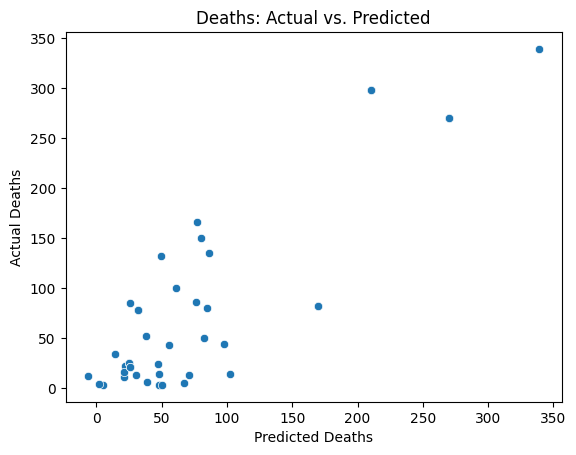

In [116]:
fig, ax = plt.subplots()

sns.scatterplot(x=preds, y=y)

ax.ax_line()
ax.set_xlabel('Predicted Deaths')
ax.set_ylabel('Actual Deaths')
ax.set_title('Deaths: Actual vs. Predicted');

## Model Heat Deaths

In [91]:
Z = hot_df.drop(columns=['country','subregion','region','start_year','location', 'start_date', 'end_date', 'duration_days', 'latitude', 'longitude', 'total_deaths', 'temperature'])

In [92]:
Z

,start_month,duration,delta_temp_C,delta_temp_std
0,5,12,26.641818,13.398198
1,5,33,55.978310,16.904774
2,5,23,26.180573,12.736790
3,5,36,36.546045,13.309940
4,7,3,15.662070,6.781608
...,...,...,...,...
59,5,97,30.588918,14.169654
60,5,97,33.112917,14.725347
61,5,97,24.900580,13.529711
62,5,97,30.752337,11.799451


In [93]:
y = hot_df['total_deaths']

In [94]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, random_state=92)

In [95]:
ct = ColumnTransformer([
    ('ss', StandardScaler(), ['duration', 'delta_temp_C', 'delta_temp_std']),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ['start_month'])
], remainder='passthrough')

In [96]:
pipe_lr = Pipeline([
    ('ct', ct),
    ('lr', LinearRegression())
])

In [97]:
pipe_lr.fit(Z_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['duration', 'delta_temp_C',
                                                   'delta_temp_std']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['start_month'])])),
                ('lr', LinearRegression())])

In [98]:
pipe_lr.score(Z_train, y_train)

0.2833967692838475

In [99]:
pipe_lr.score(Z_test, y_test)

0.32306918526927497